Este proyecto se basa en el teorema de Nyquist-Shannon, en la teoría de las series de Fourier y en el método de Monte Carlo. La idea es recibir las muestras de intensidad de alguna señal. En este caso, la intensidad de sonido de la canción Do I Wanna Know de The Artic Monkeys. Estos datos fueron obtenidos por medio del programa Sigview; sin embargo, se podrían obtener de la lectura de un micrófono. Los datos fueron exportados desde este software a un archivo de formato txt que pesa 9.058MB. Es un peso considerablemente grande, por lo que podría buscarse algún formato más eficiente, pero para la facilidad del análisis este fue el escogido. Además, cabe aclarar que en el documento sólo se guardaron los datos correspondientes a 30 segundos de la canción. Una vez se convierten los datos a un formato adecuado se crea una función que corresponde con estos datos recibidos, por medio de la teoría de señales de Nyquist-Shannon, como se explicará más adelante. Después, se hallan los coeficientes de Fourier de la serie de Fourier asociada a cada 0.1 segundos de la canción, esto es, se supone que cada intervalo de 0.1 segundos es una función distinta y esta se descompone en sus coeficientes de Fourier, que a su vez se pueden traducir como la composición frecuencial de la canción. En este caso se hallan los primeros 50 coeficientes que corresponden a frecuencias entre 20Hz y 1000 Hz (realmente la composición puede llegar a los 20000Hz, pero lo usual es que las significativas no superen frecuencias de 10000Hz). Según la teoría de las series de Fourier, estos coeficientes se pueden hallar por medio de las integrales de la función de la señal multiplicada por cierto factor. Es en esta parte donde entra en uso el método de Monte Carlo, que sirve como herramienta para hallar estas integrales sin necesidad de ningún proceso analítico. Por último, se realiza una animación del cambio de estos coeficientes para 3 segundos de la canción (debido a limitaciones de tiempo), por medio de un código modificado de uno obtenido de la página web https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/.         

In [1]:
#Se importa matplotlib y numpy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Se importa librería de matplotlib para generar la animación
from matplotlib import animation

In [3]:
#Se crea un arreglo de pares ordenados cuyos elementos son un un instante de tiempo de la canción Do I Wanna Know y la intensidad correspondiente a este momento
cancion = np.genfromtxt('DoIWannaKnow.txt')
#Se crea un arreglo de ceros para los instantes de tiempo 
tiempo = np.zeros((len(cancion)),dtype=np.float)
#Se crea un arreglo de ceros para las intensidades
intensidad = np.zeros((len(cancion)),dtype=np.float)
#Ciclo que llena los arreglos tiempo e intensidad con la información registrada de la canción. Esto se hace con el fin de facilitar el manejo
#posterior de estos datos
for instante in range(0,len(cancion)):
    tiempo[instante] = (cancion[instante])[0]
    intensidad[instante] = (cancion[instante])[1]

Se definen las constantes que definen el periodo de muestreo de los datos obtenidos de la canción, esto es, la diferencia de tiempo entre un dato y el otro y el ancho de banda frecuencial de la canción. Este ancho de banda se escoge porque la frecuencia de muestreo corresponde a un número cercano a 20000Hz, lo que significa que por la teoría de Nyquist-Shannon, únicamente se podrá reproducir la señal si su ancho de banda de composición frecuencial corresponde a la mitad de la frecuencia de muestreo. No es un problema asumir en este caso que es 10000, debido a que no es usual que en la música se utilicen frecuencias más altas de 10000Hz, dado que son muy agudas para el oido humano; sin embargo, si se tratara de otro tipo de señal, habría que asegurarse de que realmente el ancho de banda no supera esta frecuencia.

In [4]:
periodo_muestreo = float(tiempo[5]-tiempo[4]+tiempo[3]-tiempo[2]+tiempo[1]-tiempo[0])/3.0
ancho_banda = 10000 

Se define la función correspondiente al muestreo de intesidades de la canción. Esta se puede definir gracias a la teoría de Nyquist-Shannon que dice que cualquier función (que cumpla ciertos requisitos) puede ser muestreada y después reconstruida por medio de las muestras teniendo en cuenta que la frecuencia de muestreo sea el doble que el ancho de banda de la composición frecuencial de la señal, esto es, que al ser descompuesta como una suma de senos y cosenos, las frecuencias de estos no deben salirse de cierto intervalo, que sería la mitad de la frecuencia de muestreo. Para saber más acerca de esto se puede buscar referencia en algún libro sobre teoría de señales. En la página web http://wwwprof.uniandes.edu.co/~gtellez/met-mat/tarea4.pdf se aclara más sobre este teorema y la forma como se puede conseguir la fórmula utlizada acá. Así mismo, la solución se da en la página http://wwwprof.uniandes.edu.co/~gtellez/met-mat/soluciontarea4_20151.pdf. También se refieren a la fórmula en wikipedia: http://es.wikipedia.org/wiki/Teorema_de_muestreo_de_Nyquist-Shannon.

In [5]:
def funcion_cancion(t):    
    intensidad_F = 0
    for n in range(0,3):   #Se realilza una suma de 0 a 3, aunque realmente debería realizarse de 0 a infinito. Sin embargo, gracias a lo rápido que decrece la función sinc, no es necesario realizar más iteraciones.
        #Se añade un -0.355 al tiempo t como factor correctivo, porque la función aparece desplazada (ignoro el porqué pero supongo que se debe a algún error en el tiempo de muestreo asumido)
        intensidad_F+= np.sinc(2*ancho_banda*(((t-0.355)-int((t-0.355)/periodo_muestreo)*periodo_muestreo)-n*periodo_muestreo))*intensidad[n+int((t-0.355)/periodo_muestreo)-1] 
    intensidad_F *= (periodo_muestreo*2*ancho_banda)
    return intensidad_F

Se realiza una prueba para observar que en efecto los datos se estén adquiriendo del archivo

In [6]:
intensidad_F = funcion_cancion(21.52)
print intensidad_F

3530.18971758


Se grafica la función de la canción para un intervalo de 0.1 segundos

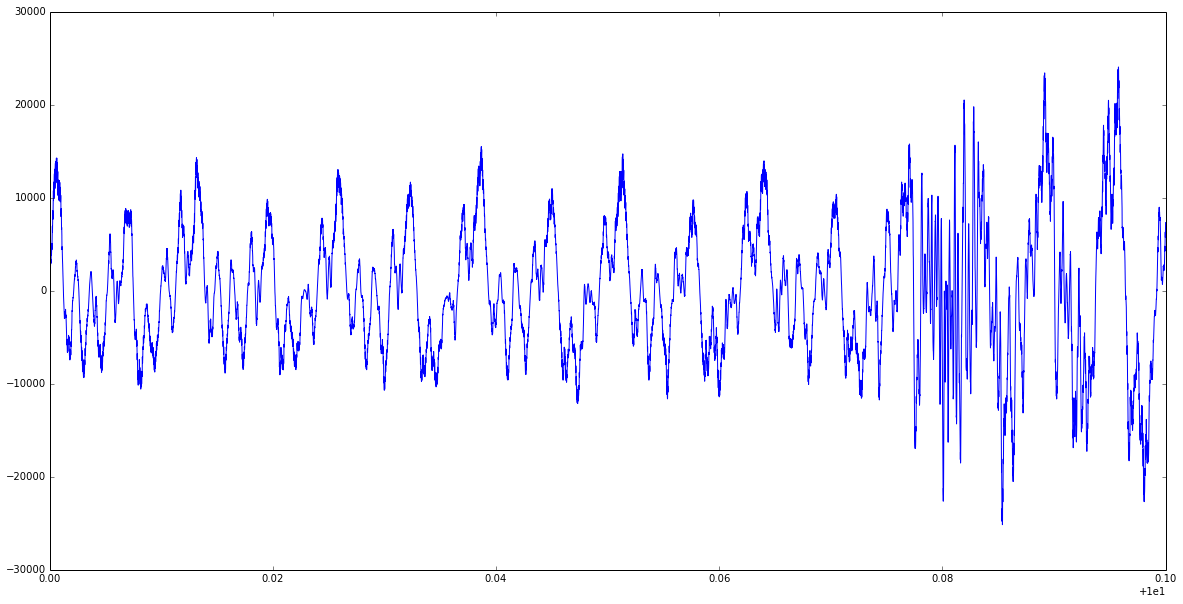

In [7]:
x = linspace(10,10.1,10000)
i = []
for numero in x:
    i.append(funcion_cancion(numero))
figure(figsize = (20,10))
plot(x,i)

Se grafican las muestras para el mismo intervalo con el fin de verificar que se parezcan lo suficiente. Como se puede notar, en efecto son bastante similares, dado que cuentan cono los mismos picos. Se observa además que en la primera los picos cuentan con ciertos picos pequeños adicionales en el caso de la función. Esto se debe a que la función debe cumplir con ciertas condiciones de continuidad con las que las muestras no.

(-30000, 30000)

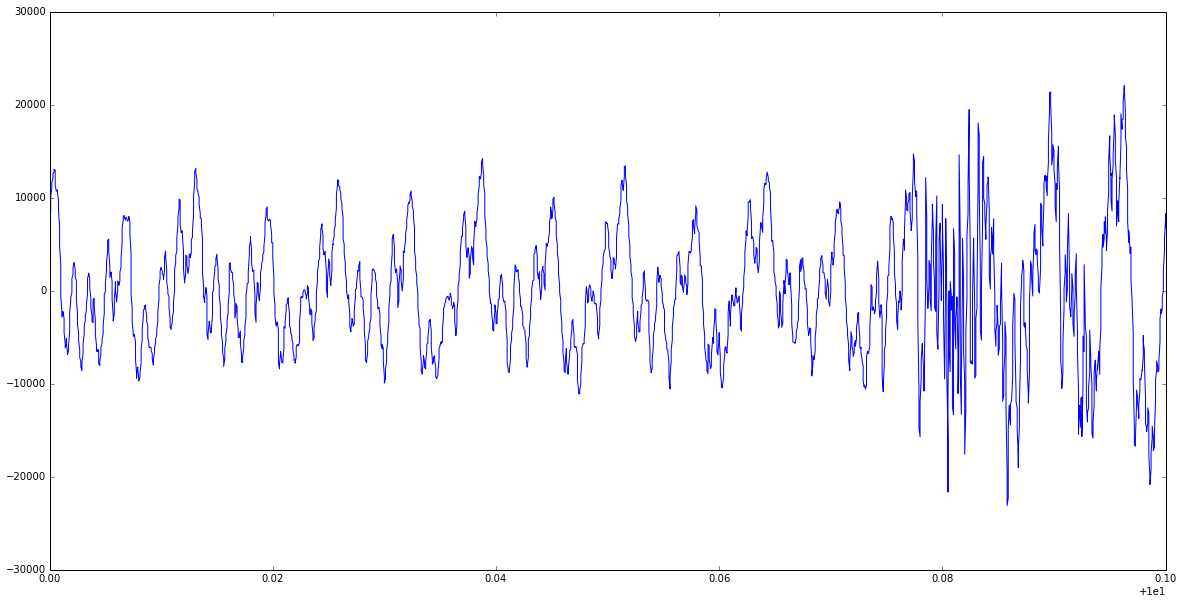

In [8]:
figure(figsize = (20,10))
plot(tiempo,intensidad)
xlim(10,10.1)
ylim(-30000,30000)

Se definen las constantes de la cantidad de intervalos en los que se van a dividir los 30 segundos de la canción y el periodo de análisis de correspondiente a los 0.1 segundos tal y como se explicó antes.

In [9]:
cantidad_instantes = 300
periodo_analisis = tiempo[len(tiempo)-1]/cantidad_instantes

Se realiza una prueba de cómo hallar la primera constante de la serie de Fourier para un intervalo cualquiera

In [10]:
    #Se establecen los límites de tiempo
    min_t = 160 * periodo_analisis
    max_t = min_t + periodo_analisis
    
    #Se guardan en un arreglo las intensidades correspondientes al intervalo de tiempo análizado
    intensidadesA = []
    for n in range(int(min_t/periodo_muestreo),int(max_t/periodo_muestreo)):
        intensidadesA.append(intensidad[n])
        
    #Se establecen los límites de intensidades 
    min_I = min(intensidadesA)
    max_I = max(intensidadesA)
    
    #Se generan 10000 puntos aleatorios dentro de los límites establecidos
    cantidad_aleatorios = 10000
    tiempos_aleatorios = random.rand(cantidad_aleatorios) * (max_t - min_t) + min_t
    intensidades_aleatorias = random.rand(cantidad_aleatorios) * (max_I - min_I) + min_I
    
    #Se evalúan los tiempos del intervalo en la función de la canción
    funcion_eval = []
    for T in tiempos_aleatorios:
        funcion_eval.append(funcion_cancion(T))
    
    #Se seleccionan aquellos datos que se encuentran debajo de la función y arriba del eje cuando esta es positiva o arriba de la función y debajo del cero cuando es negativa
    indicesD0 = np.where(np.absolute(funcion_eval) - np.absolute(intensidades_aleatorias) > 0.0)
    
    tiemposD0 = tiempos_aleatorios[indicesD0]
    intensidadesD0 = intensidades_aleatorias[indicesD0]
    
    funcion_evalD0 = []
    for T in tiemposD0:
        funcion_evalD0.append(funcion_cancion(T))
    
    indicesM0 = np.where(funcion_evalD0*intensidadesD0 > 0.0) #se asegura que los datos tengan el mismo signo de la función
    
    tiemposM0 = tiemposD0[indicesM0]
    intensidadesM0 = intensidadesD0[indicesM0]
    
    indicesArr0 = np.where(intensidadesM0 > 0.0) #se asegura que los datos sean positivos 
    indicesAb0 = np.where(intensidadesM0 < 0.0) #se asegura que los datos sean negativos
    
    tiemposArr0 = tiemposM0[indicesArr0]
    intensidadesArr0 = intensidadesM0[indicesArr0]
    tiemposAb0 = tiemposM0[indicesAb0]
    intensidadesAb0 = intensidadesM0[indicesAb0]    
    
    c0 = np.absolute((1/periodo_analisis)*(float(len(tiemposArr0))/float(len(tiempos_aleatorios))-float(len(tiemposAb0))/float(len(tiempos_aleatorios)))*(max_t-min_t)*(max_I-min_I)) #se determina el primer coeficiente
    print c0

401.608


Se grafica por medio de varias dispersiones cómo luce la función en el intervalo analizado y cómo se determinaron las regiones debajo y arriba de la función. Esto para verificar que sean las deaseadas.

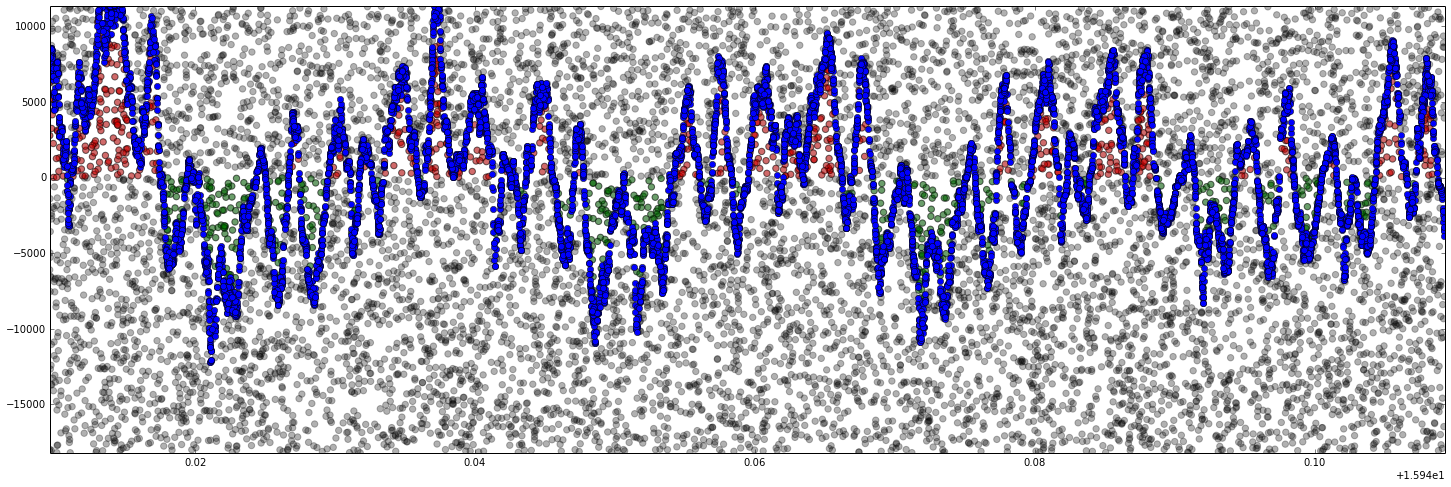

In [11]:
plt.figure(figsize=(25,8))
plt.plot(tiempos_aleatorios,funcion_eval, 'bo')
plt.scatter(tiempos_aleatorios,intensidades_aleatorias, c='k', alpha=0.3, s=40)
plt.scatter(tiemposArr0,intensidadesArr0, c='r', alpha=0.4, s=40)
plt.scatter(tiemposAb0,intensidadesAb0, c='g', alpha=0.4, s=40)
plt.xlim(min_t, max_t)
plt.ylim(min_I, max_I)
plt.show()

Una vez realizado el código para el primer coeficiente de un intervalo, se define una función que halla los primeros 50 siguiendo exactamente el mismo código dentro de un ciclo for.

In [12]:
def serie_Fourier(instante,frecuencia):
    
    coeficientes = np.zeros((50),dtype=np.float)
    
    min_t = instante * periodo_analisis
    max_t = min_t + periodo_analisis
    
    intensidadesA = []
    for n in range(int(min_t/periodo_muestreo),int(max_t/periodo_muestreo)):
        intensidadesA.append(intensidad[n])
        
    min_I = min(intensidadesA)
    max_I = max(intensidadesA)
    
    cantidad_aleatorios = 10000
    tiempos_aleatorios = random.rand(cantidad_aleatorios) * (max_t - min_t) + min_t
    intensidades_aleatorias = random.rand(cantidad_aleatorios) * (max_I - min_I) + min_I
    
    funcion_eval = []
    for T in tiempos_aleatorios:
        funcion_eval.append(funcion_cancion(T))
    
    indicesD0 = np.where(np.absolute(funcion_eval) - np.absolute(intensidades_aleatorias) > 0.0)
    
    tiemposD0 = tiempos_aleatorios[indicesD0]
    intensidadesD0 = intensidades_aleatorias[indicesD0]
    
    funcion_evalD0 = []
    for T in tiemposD0:
        funcion_evalD0.append(funcion_cancion(T))
    
    indicesM0 = np.where(funcion_evalD0*intensidadesD0 > 0.0)
    
    tiemposM0 = tiemposD0[indicesM0]
    intensidadesM0 = intensidadesD0[indicesM0]
    
    indicesArr0 = np.where(intensidadesM0 > 0.0)
    indicesAb0 = np.where(intensidadesM0 < 0.0)
    
    tiemposArr0 = tiemposM0[indicesArr0]
    intensidadesArr0 = intensidadesM0[indicesArr0]
    tiemposAb0 = tiemposM0[indicesAb0]
    intensidadesAb0 = intensidadesM0[indicesAb0]    
    
    coeficientes[0] = np.absolute((1/periodo_analisis)*(float(len(tiemposArr0))/float(len(tiempos_aleatorios))-float(len(tiemposAb0))/float(len(tiempos_aleatorios)))*(max_t-min_t)*(max_I-min_I))
        
        
    for n in range(1,50):
        
        funcion_evaln = []
        for T in tiempos_aleatorios:
            funcion_evaln.append(funcion_cancion(T)*np.cos(2*np.pi*n*frecuencia*T))
    
        indicesDn = np.where(np.absolute(funcion_evaln) - np.absolute(intensidades_aleatorias) > 0.0)
                   
        tiemposDn = tiempos_aleatorios[indicesDn]
        intensidadesDn = intensidades_aleatorias[indicesDn]
        
        funcion_evalDn = []
        for T in tiemposDn:
            funcion_evalDn.append(funcion_cancion(T))
    
        indicesMn = np.where(funcion_evalDn*intensidadesDn > 0.0)
    
        tiemposMn = tiemposDn[indicesMn]
        intensidadesMn = intensidadesDn[indicesMn]
    
        indicesArrn = np.where(intensidadesMn > 0.0)
        indicesAbn = np.where(intensidadesMn < 0.0)
    
        tiemposArrn = tiemposMn[indicesArrn]
        intensidadesArrn = intensidadesMn[indicesArrn]
        tiemposAbn = tiemposMn[indicesAbn]
        intensidadesAbn = intensidadesMn[indicesAbn]    
    
        an = (2/periodo_analisis)*(float(len(tiemposArrn))/float(len(tiempos_aleatorios))-float(len(tiemposAbn))/float(len(tiempos_aleatorios)))*(max_t-min_t)*(max_I-min_I)
        
               
        funcion_evaln = []
        for T in tiempos_aleatorios:
            funcion_evaln.append(funcion_cancion(T)*np.sin(2*np.pi*n*frecuencia*T))
    
        indicesDn = np.where(np.absolute(funcion_evaln) - np.absolute(intensidades_aleatorias) > 0.0)
                   
        tiemposDn = tiempos_aleatorios[indicesDn]
        intensidadesDn = intensidades_aleatorias[indicesDn]
        
        funcion_evalDn = []
        for T in tiemposDn:
            funcion_evalDn.append(funcion_cancion(T))
    
        indicesMn = np.where(funcion_evalDn*intensidadesDn > 0.0)
    
        tiemposMn = tiemposDn[indicesMn]
        intensidadesMn = intensidadesDn[indicesMn]
    
        indicesArrn = np.where(intensidadesMn > 0.0)
        indicesAbn = np.where(intensidadesMn < 0.0)
    
        tiemposArrn = tiemposMn[indicesArrn]
        intensidadesArrn = intensidadesMn[indicesArrn]
        tiemposAbn = tiemposMn[indicesAbn]
        intensidadesAbn = intensidadesMn[indicesAbn]    
    
        bn = (2/periodo_analisis)*(float(len(tiemposArrn))/float(len(tiempos_aleatorios))-float(len(tiemposAbn))/float(len(tiempos_aleatorios)))*(max_t-min_t)*(max_I-min_I)       
        
        coeficientes[n] = (an**2+bn**2)**(0.5)/2               
        
    return coeficientes  

Se determina el arreglo de coeficientes para algún intervalo de prueba. Si este se corre se observa un tiempo de demora de 1 minuto aproximadamente. Este es un tiempo considerablemente grande y muestra que el código no es lo suficientemente eficiente como para realizar esta tarea; sin embargo, no sería necesario cambiar todo el cógido sino introducir algún tipo de función vectorizada.

In [13]:
coeficientes_Fourier = []
coeficientes_Fourier.append(serie_Fourier(160,20))

Se define un arreglo que contiene a la frecuencias dentro de los 20 y 1000Hz con el fin de graficar los coeficientes recien determinados.

In [16]:
frecuencias = []
for n in range(0,50):
    frecuencias.append(n*20)

Como se puede observar en la gráfica, hay dos o tres picos pronunciados, que corresponden a la composición frecuencial más significativa en ese intervalo.

(0, 1000)

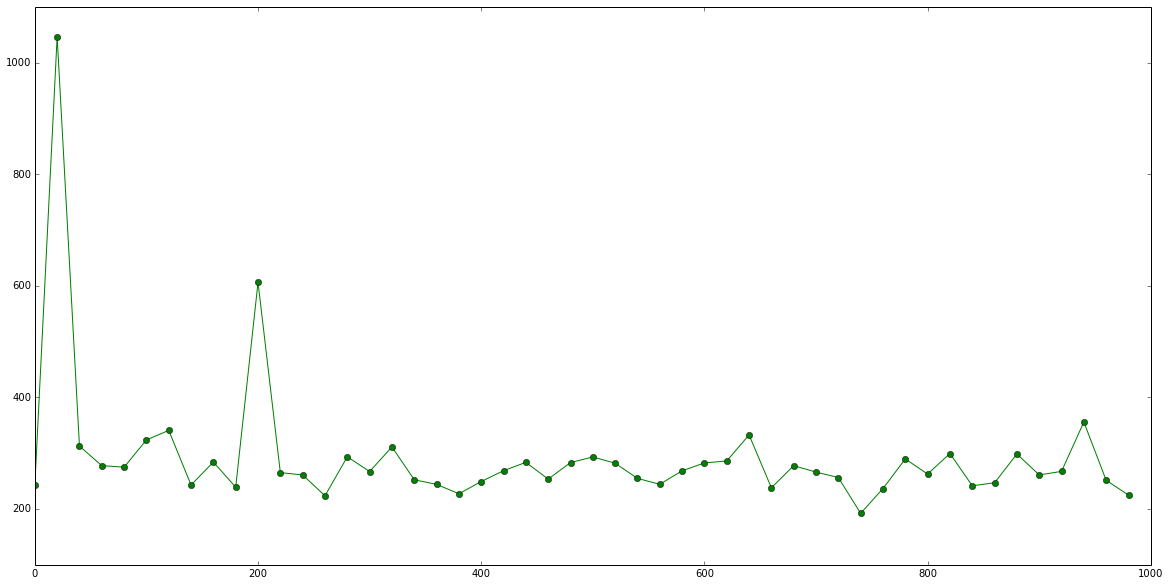

In [17]:
plt.figure(figsize = (20,10))
plt.plot(frecuencias,coeficientes_Fourier[0], 'go-')
plt.xlim(0,1000)

El código siguiente guarda en un archivo los coeficientes entre los segundos 16 y 26; sin embargo, por limitaciones de tiempo sólo se capturan hasta el segundo 19

In [ ]:
#la reproducción de este fragmento de código puede tardar bastante; desde Jupyter tarda más de una hora
file = open("DoIWannaKnowCoeficientes.txt", "w")
for n in range(160,260):   
    coeficiente_Fourier = serie_Fourier(n,20)
    i = 0
    while (i<50):
        numero = coeficiente_Fourier[i]
        if (i!=49):
            file.write("%f," %numero)
        else:
            file.write("%f" %numero)
        i+=1
    file.write("\n")
file.close()

In [18]:
#Se crea un arreglo de pares ordenados cuyos elementos son un un instante de tiempo de determinada canción y la intensidad correspondiente a este momento
coeficientes_cancion = np.genfromtxt('DoIWannaKnowCoeficientes.txt', delimiter=',', autostrip=True)

coeficientes_Fourier = []
max_c = 0
min_c = 0

for linea in coeficientes_cancion:
    coeficientes = []
    if max(linea)>max_c:
        max_c = max(linea)
    if min(linea)<min_c:
        min_c = min(linea)       
    for n in range(0,len(linea)-1):
        coeficientes.append(linea[n])
    coeficientes_Fourier.append(coeficientes)

Se exporta una animación con la evolución frecuencial de la canción. Se puede observar que en general existen ciertos picos frecuenciales, pero en otros momentos casi todas las frecuencias tienen una intensidad similar. Debido a que lo más usual es lo primero, posiblemente la baja densidad de frecuencias, dado que sólo se hizo un análisis cada 20Hz, así como la baja cantidad de puntos aleatorios para determinar los coeficientes puede afectar significativamente estos picos. De tal manera que se concluye que aunque si bien es un código útil, es necesaria una optimización en eficiencia significativa, en especial si el análisis es sobre una canción, dado que se desearía una reproducción de la composición frecuencial con la misma velocidad de reproducción de la canción. 

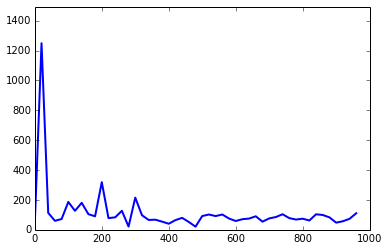

In [21]:
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 1000), ylim=(min_c, max_c))
line, = ax.plot([], [], lw=2)

#Se definen las frecuencias correspondientes a los datos del archivo
frecuencias = []
for n in range(0,49):
    frecuencias.append(n*20)
    
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = frecuencias
    y = coeficientes_Fourier[i]
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(coeficientes_Fourier)-1, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed. You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('coeficientes.mp4', writer='ffmpeg', fps=3)

plt.show()

Este análsis es importante dado que permite descomponer una señal en frecuencias y hacer un análisis en este espacio, que puede resultar más sencillo, tal y como se explica en la teoría de las series de Fourier. Por ejemplo, para realizar análisis de cómo es afectada la señal por ciertas condiciones de frontera resulta mucho más sencillo trabajar con funciones sinusoidales que con casi cualquier otro tipo de función; además que es posible solucionar ecuaciones diferenciales lineales de una manera mucho más sencilla por medio de la transformación de la ecuación diferencial en una convolución y después en una multiplicación de coeficientes de Fourier al pasar al espacio de las frecuencias la ecuación (para más detalle se puede buscar información sobre la teoría de Fourier, por ejemplo en el libro de Métodos Matemáticos escrito por Gabriel Tellez del departamento de Física de la Universidad de los Andes). Adicionalmente, con algo más de tiempo, presupuesto y conocimiento en programación este proyecto podría resultar en un programa industrial o académico que ayude al estudio de señales en general, de música, de ondas electromagnéticas, etc., que bien podría ser de código libre o comercial. 